In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Question -->1) Salary_hike -> Build a prediction model for Salary_hike


Input Variable X = YearsExperience Output Variable Y= Salary

Step 1 - Download and Read the dataset

In [2]:
Salary_Data = pd.read_csv('Salary_Data.csv')
Salary_Data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Step 2 - Visualization for the given dataset

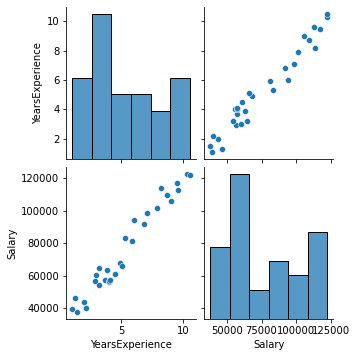

In [4]:
sns.pairplot(Salary_Data.iloc[:,0:2])


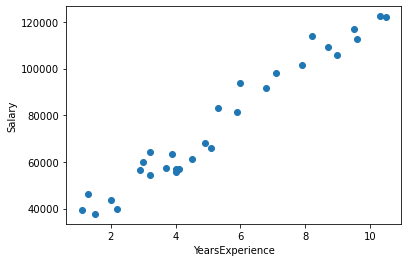

In [5]:
plt.scatter(x = Salary_Data['YearsExperience'], y = Salary_Data['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

### Step 3. Create a Machine Learning Model

Model Creation using Statsmodel

In [6]:
Salary_Data.YearsExperience.corr(Salary_Data.Salary)
np.corrcoef(Salary_Data.YearsExperience,Salary_Data.Salary)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [7]:
linear_model=smf.ols("YearsExperience~Salary",data=Salary_Data).fit()
linear_model.params
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.14e-20
Time:                        15:04:49   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
linear_model.conf_int(0.05)

,0,1
Intercept,-3.053603,-1.712718
Salary,0.000093,0.000110


In [9]:
prediction=linear_model.predict(Salary_Data.iloc[:,1])
print(prediction)

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64


In [10]:
#Splitting 3/4 of the data for training and 1/4 for testing

x=np.array([Salary_Data["YearsExperience"]]).reshape(-1,1)#X value input - Years of Experience
y = np.array([Salary_Data["Salary"]]).reshape(-1,1)# Y value output - Salary Hike
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train

array([[ 7.9],
       [ 9.5],
       [ 2.2],
       [ 1.3],
       [ 5.1],
       [ 4.5],
       [ 3.9],
       [ 5.3],
       [ 6.8],
       [ 6. ],
       [ 4. ],
       [10.5],
       [ 1.5],
       [ 8.2],
       [ 5.9],
       [10.3],
       [ 1.1],
       [ 3.2],
       [ 3.2],
       [ 9.6],
       [ 9. ],
       [ 3. ]])

In [11]:
y_train

array([[101302.],
       [116969.],
       [ 39891.],
       [ 46205.],
       [ 66029.],
       [ 61111.],
       [ 63218.],
       [ 83088.],
       [ 91738.],
       [ 93940.],
       [ 55794.],
       [121872.],
       [ 37731.],
       [113812.],
       [ 81363.],
       [122391.],
       [ 39343.],
       [ 64445.],
       [ 54445.],
       [112635.],
       [105582.],
       [ 60150.]])

In [12]:
model=LinearRegression().fit(x_train,y_train)
model.score(x_test,y_test)*100 # Evaluate the model
x_test

array([[8.7],
       [4.1],
       [7.1],
       [4.9],
       [3.7],
       [2.9],
       [4. ],
       [2. ]])

In [13]:
y_test

array([[109431.],
       [ 57081.],
       [ 98273.],
       [ 67938.],
       [ 57189.],
       [ 56642.],
       [ 56957.],
       [ 43525.]])

In [14]:
y_pred= model.predict(x_test)#Predict the model
print(y_pred)

[[107967.49327513]
 [ 65398.87772119]
 [ 93161.01829985]
 [ 72802.11520883]
 [ 61697.25897737]
 [ 54294.02148973]
 [ 64473.47303524]
 [ 45965.37931613]]


### Step 4. Visualization for the predicted model


Text(0, 0.5, 'Salary')

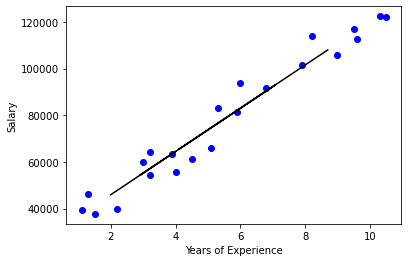

In [15]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,y_pred,color='k')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

Step 5. Summary

Adjusted. R-squared = 0.955 which reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
const coefficient is Y-intercept = 0.0001. It means that if both the YearsExperience and Salary coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
YearsExperience coefficient represents the change in the output Y due to a change of one unit in the Salary
std err =0.327 which reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
Confidence Interval = [0.025,0.975] represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

## Question --> 2) Delivery_time -> Predict delivery time using sorting time


Input Variable = Sorting Time & Output Variable = Delivery Time

Step 1. Import the delivery_time csv file and read the file

In [29]:
Delivery_Time_Df = pd.read_csv('delivery_time.csv')
Delivery_Time_Df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [30]:
Delivery_Time_Df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Step 2. Visualisation for the given dataset



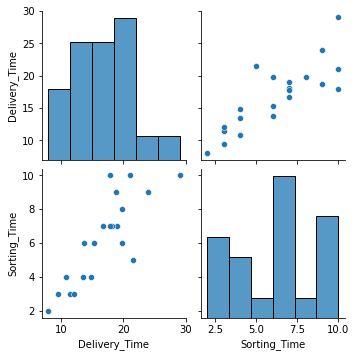

In [31]:
sns.pairplot(Delivery_Time_Df.iloc[:,0:2])


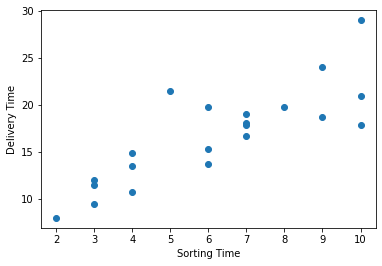

In [32]:
plt.scatter(x = Delivery_Time_Df['Sorting_Time'], y = Delivery_Time_Df['Delivery_Time'])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

### Step 3. Creating Machine Learning Model

Model creation using statsmodels

In [33]:
Delivery_Time_Df.Sorting_Time.corr(Delivery_Time_Df.Delivery_Time)
np.corrcoef(Delivery_Time_Df.Sorting_Time,Delivery_Time_Df.Delivery_Time)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [35]:
linear_model=smf.ols("Sorting_Time~Delivery_Time",data=Delivery_Time_Df).fit()
linear_model.params
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                        15:21:38   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery_Time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
linear_model.conf_int(0.05)

,0,1
Intercept,-3.130058,1.616712
Delivery_Time,0.278169,0.549318


In [37]:
prediction =linear_model.predict(Delivery_Time_Df.iloc[:,0])
print(prediction)

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64


Model creation using Sklearn



In [38]:
x=np.array([Delivery_Time_Df["Sorting_Time"]]).reshape(-1,1)
y=np.array([Delivery_Time_Df["Delivery_Time"]]).reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

x_train

array([[ 5],
       [ 9],
       [10],
       [ 7],
       [ 3],
       [ 7],
       [ 4],
       [ 6],
       [ 9],
       [ 7],
       [ 8],
       [10],
       [ 4],
       [ 2],
       [ 3]], dtype=int64)

In [39]:
y_train

array([[21.5 ],
       [24.  ],
       [21.  ],
       [18.11],
       [11.5 ],
       [16.68],
       [14.88],
       [15.35],
       [18.75],
       [19.  ],
       [19.83],
       [29.  ],
       [10.75],
       [ 8.  ],
       [ 9.5 ]])

In [40]:
model=LinearRegression().fit(x_train,y_train)
model.score(x_test,y_test)*100

-23.69204737812978

In [42]:
print('--------X Test---------- \n',x_test)
print('\n--------Y Test ---------\n',y_test)

--------X Test---------- 
 [[ 3]
 [ 6]
 [ 6]
 [10]
 [ 7]
 [ 4]]

--------Y Test ---------
 [[12.03]
 [19.75]
 [13.75]
 [17.9 ]
 [17.83]
 [13.5 ]]


In [43]:
y_pred=model.predict(x_test)
print(y_pred)

[[11.07556604]
 [16.69086253]
 [16.69086253]
 [24.17792453]
 [18.56262803]
 [12.94733154]]


### Step 4. Visualization for the predicted model



<function matplotlib.pyplot.show(close=None, block=None)>

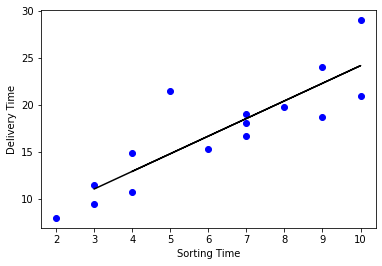

In [44]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_test,y_pred,color='k')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show


Step 5.Summary

Adjusted. R-squared = 0.682 which reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
const coefficient is Y-intercept = 0.4137 It means that if both the Sorting Time and Delivery Time coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
Sorting Time coefficient represents the change in the output Y due to a change of one unit in the Delivery Time
std err =1.134 which reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
P >|t| is your p-value. A p-value of greater than 0.05 is considered as not statistically significant
Confidence Interval = [0.025,0.975] represents the range in which our coefficients are likely to fall (with a likelihood of 95%)